# Initial test to run ECmean4 functions within the AQUA framework

We load the AQUA routines, keeping in mind that we need to adjust some path

In [1]:
import sys 
sys.path.append('../../') 
from aqua import Reader

Open a small cluster to speed up the operations with dask (not required)

In [ ]:
# from dask.distributed import LocalCluster, Client, progress
# processes = False
# nworker = 2
# ncpu = 2
# threads = ncpu // nworker
# print(f"Number of CPUs: {ncpu}, number of threads: {threads}, number of workers: {nworker}, processes: {processes}")
# client = Client(processes=processes,
#  threads_per_worker=threads,
#  n_workers=nworker,
#  memory_limit='64GB'
#  )

Start loading the ecmean functions, define the years of the experiments and experiment name

In [2]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
from wand.image import Image as WImage # to open PDFs in jupyter

model = 'IFS'
exp = 'tco2559-ng5'
year1 = 2020
year2 = 2020
numproc = 1
interface = 'interface_IFS+NEMO-intake.yml'
config = 'config_intake.yml'

reader = Reader(model=model, exp=exp, source="lra_r100", configdir = "../../config")
data = reader.retrieve(fix=False)
data


<xarray.Dataset>
Dimensions:  (time: 13, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-31 2020-02-29 ... 2021-01-31
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    2t       (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    lsm      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    msl      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    tcc      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    tp       (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    tsr      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    ttr      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>

# Global Mean
Basic call to global mean, creating a dumb interface file for IFS/NEMO and working directly on the 1x1 files

In [3]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

global_mean


Average net_toa ALL Global 33.00768163627577
Average tas ALL Global 9.972965855426992
Average pr ALL Global 43.74456186539162
Average psl ALL Global 1012.0813771790124
Average rsnt ALL Global 3509.9746051507836
Average rlnt ALL Global -3476.9669235145093
Average siconc ALL Global 0.08412893605385854
Done in 1.4084 seconds
/work/bb1153/b382076/ecmean/tables/global_mean_tco2559-ng5_IFS+NEMO_r1i1p1f1_2020_2020.txt
Postproc done in 1.7644 seconds


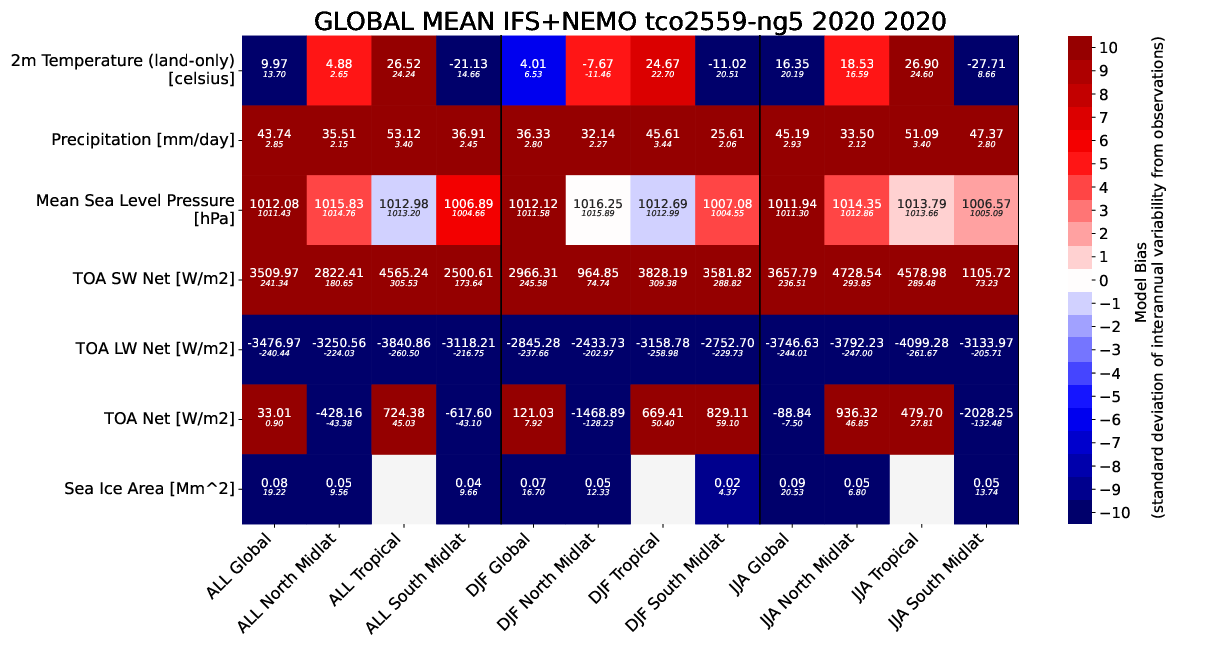

In [5]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/global_mean_{exp}_IFS+NEMO_r1i1p1f1_{year1}_{year2}.pdf')
img

# Performance indices
Basic call to performance indices

In [3]:
performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

performance_indices


Preproc in 4.3280 seconds
PI for Global ALL tas 28.506
PI for Global DJF tas 13.937
PI for Global JJA tas 27.218
PI for Global ALL pr 13748.672
PI for Global DJF pr 2979.527
PI for Global JJA pr 6162.271
PI for Global ALL psl 3.152
PI for Global DJF psl 1.549
PI for Global JJA psl 2.83
PI for Global ALL siconc 4.854
PI for Global DJF siconc 2.047
PI for Global JJA siconc 10.816
Done in 1.7285 seconds with 1 processors
['2m Temperature (land-only)', 'Precipitation', 'Mean Sea Level Pressure', 'Sea-ice Concentration']
{'2m Temperature (land-only)': {'ALL': {'Global': 35.311, 'North Midlat': 16.466, 'Tropical': 54.585, 'South Midlat': 23.679}, 'DJF': {'Global': 20.926, 'North Midlat': 9.262, 'Tropical': 32.577, 'South Midlat': 17.09}, 'JJA': {'Global': 29.433, 'North Midlat': 17.799, 'Tropical': 42.555, 'South Midlat': 7.283}}, 'Precipitation': {'ALL': {'Global': 7.47, 'North Midlat': 4.18, 'Tropical': 11.127, 'South Midlat': 3.444}, 'DJF': {'Global': 5.525, 'North Midlat': 2.375, 'Tropic

Open the obtained txt file

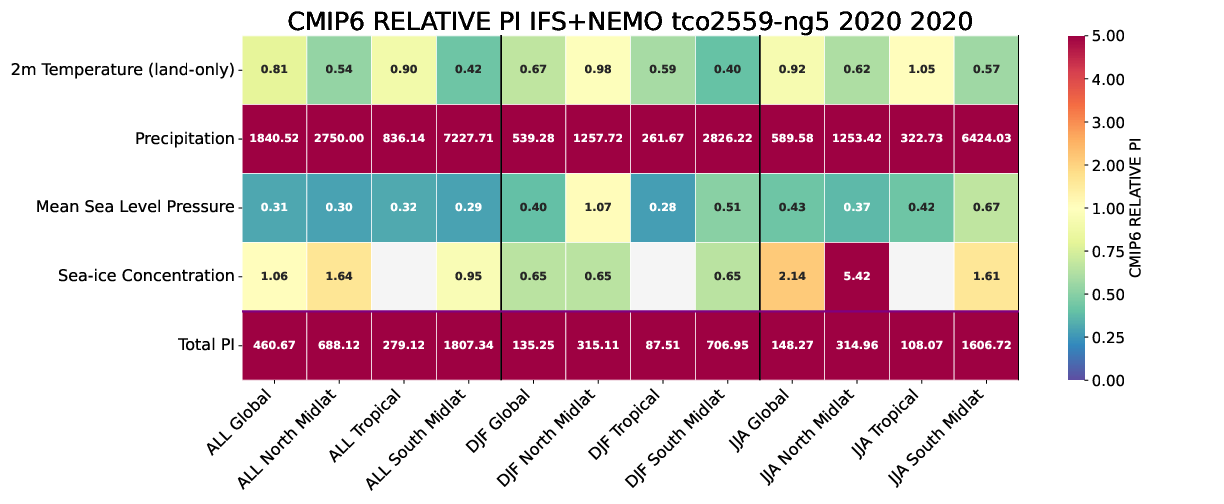

In [4]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/PI4_EC23_{exp}_IFS+NEMO_r1i1p1f1_{year1}_{year2}.pdf')
img